In [76]:
# Importando o pandas
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [27]:
#treino = pd.read_csv("C:\codigos\py 2023\All Space Missions from 1957\Space_Corrected.csv")
treino = pd.read_csv("Space_Corrected.csv")
treino.head(3)

,Unnamed: 0.1,Unnamed: 0,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success


In [28]:
from ydata_profiling import ProfileReport

In [29]:
profile = ProfileReport(treino, title="treino")

In [30]:
profile.to_file("treino.html")

Summarize dataset:  69%|████████████████████████           | 11/16 [00:02<00:02,  2.17it/s, Calculate auto correlation]C:\Users\vinic\AppData\Local\Programs\Python\Python311\Lib\site-packages\ydata_profiling\model\correlations.py:66: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'could not convert string to float: 'Success'')
  warnings.warn(
Export report to file: 100%|█████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 56.38it/s]


In [31]:
treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Company Name    4324 non-null   object
 3   Location        4324 non-null   object
 4   Datum           4324 non-null   object
 5   Detail          4324 non-null   object
 6   Status Rocket   4324 non-null   object
 7   Rocket          964 non-null    object
 8   Status Mission  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


In [32]:
# Verificando o tipo dos dados
treino.dtypes.value_counts()

object    7
int64     2
Name: count, dtype: int64

In [33]:
# Verificando a cardinalidade dos dados
treino.nunique().sort_values(ascending=False)

Unnamed: 0.1      4324
Unnamed: 0        4324
Datum             4319
Detail            4278
Location           137
Company Name        56
Rocket              56
Status Mission       4
Status Rocket        2
dtype: int64

# DataSet Lancamentos Espaciais 1957- 2020
## Carregamento e limpeza


In [34]:
treino = treino.drop(["Unnamed: 0.1","Unnamed: 0"],axis=1)

In [61]:
#treino.Rocket.value_counts()
treino.describe()


,Rocket
count,4324.000000
mean,129.795237
std,67.068131
min,5.300000
25%,129.795237
50%,129.795237
75%,129.795237
max,450.000000


In [36]:
treino.isnull().sum().sort_values(ascending=False).head(5)

Rocket          3360
Company Name       0
Location           0
Datum              0
Detail             0
dtype: int64

In [56]:
#mean_rocket = treino['Rocket'].mean(skipna=True)
treino['Rocket'] = pd.to_numeric(treino['Rocket'], errors='coerce')
treino

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.000000,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.750000,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,129.795237,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.000000,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.000000,Success
...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,129.795237,Failure
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,129.795237,Success
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,129.795237,Failure
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,129.795237,Success


In [46]:
print(treino.columns)

Index(['Company Name', 'Location', 'Datum', 'Detail', 'Status Rocket',
       'Rocket', 'Status Mission'],
      dtype='object')


## Media do custo dos lancamentos espaciais 



In [57]:
# Calcula a média ignorando NaN - valores medios dos lancamentos de foguetes
mean_rocket = treino['Rocket'].mean(skipna=True)

In [58]:
mean_rocket 

129.79523709167552

In [59]:
# Substitui NaN pela média
treino['Rocket'].fillna(mean_rocket, inplace=True)

In [55]:
treino

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.000000,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.750000,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,129.795237,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.000000,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.000000,Success
...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,129.795237,Failure
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,129.795237,Success
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,129.795237,Failure
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,129.795237,Success


In [60]:
treino.isnull().sum().sort_values(ascending=False).head(5)

Company Name     0
Location         0
Datum            0
Detail           0
Status Rocket    0
dtype: int64

In [62]:
treino.describe()

,Rocket
count,4324.000000
mean,129.795237
std,67.068131
min,5.300000
25%,129.795237
50%,129.795237
75%,129.795237
max,450.000000


In [63]:
treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Company Name    4324 non-null   object 
 1   Location        4324 non-null   object 
 2   Datum           4324 non-null   object 
 3   Detail          4324 non-null   object 
 4   Status Rocket   4324 non-null   object 
 5   Rocket          4324 non-null   float64
 6   Status Mission  4324 non-null   object 
dtypes: float64(1), object(6)
memory usage: 236.6+ KB


In [64]:
treino.isnull().sum().sort_values(ascending=False).head(5)

Company Name     0
Location         0
Datum            0
Detail           0
Status Rocket    0
dtype: int64

In [80]:
agency_counts = treino['Company Name'].value_counts()[lambda x: x >= 50]

In [81]:
agency_counts

Company Name
RVSN USSR           1777
Arianespace          279
CASC                 251
General Dynamics     251
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
SpaceX               100
MHI                   84
Northrop              83
Lockheed              79
ISRO                  76
Roscosmos             55
Name: count, dtype: int64

## Media dos lancamentos espaciais por empresas; 
considerando empresas com mais de 50 lancamentos


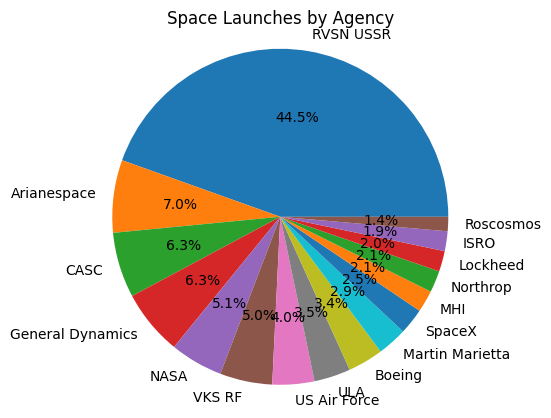

In [83]:
plt.pie(agency_counts, labels=agency_counts.index, autopct='%1.1f%%')
plt.title('Space Launches by Agency')
plt.axis('equal')
plt.show()